## 1. yahoo_finance

In [2]:
import yfinance as yf
import pandas as pd

In [4]:
pfe = yf.Ticker('PFE')

In [19]:
pfe

yfinance.Ticker object <PFE>

In [28]:
pfe.get_info()

In [7]:
hist = pfe.history(period="6mo")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-09-25 00:00:00-04:00,31.776929,32.058830,31.504751,32.058830,19443700,0.0,0.0
2023-09-26 00:00:00-04:00,31.806095,32.039389,31.456150,31.495033,26015500,0.0,0.0
2023-09-27 00:00:00-04:00,31.524196,31.592240,31.008998,31.203411,26430100,0.0,0.0
2023-09-28 00:00:00-04:00,31.164530,31.417267,30.882630,31.193691,28197600,0.0,0.0
2023-09-29 00:00:00-04:00,31.446426,32.301848,31.397824,32.243523,42397800,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-18 00:00:00-04:00,28.010000,28.030001,27.610001,27.719999,36226500,0.0,0.0
2024-03-19 00:00:00-04:00,27.670000,27.780001,27.320000,27.629999,29026600,0.0,0.0
2024-03-20 00:00:00-04:00,27.480000,27.740000,27.209999,27.700001,34468000,0.0,0.0


In [9]:
hist.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [11]:
hist['Dividends'].unique()

array([0.  , 0.41, 0.42])

In [12]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125 entries, 2023-09-25 00:00:00-04:00 to 2024-03-22 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          125 non-null    float64
 1   High          125 non-null    float64
 2   Low           125 non-null    float64
 3   Close         125 non-null    float64
 4   Volume        125 non-null    int64  
 5   Dividends     125 non-null    float64
 6   Stock Splits  125 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 7.8 KB


### Some Examples on Using Yahoo Finance API

In [14]:
tickers = ['TSLA', 'API', 'LMND','MRK']

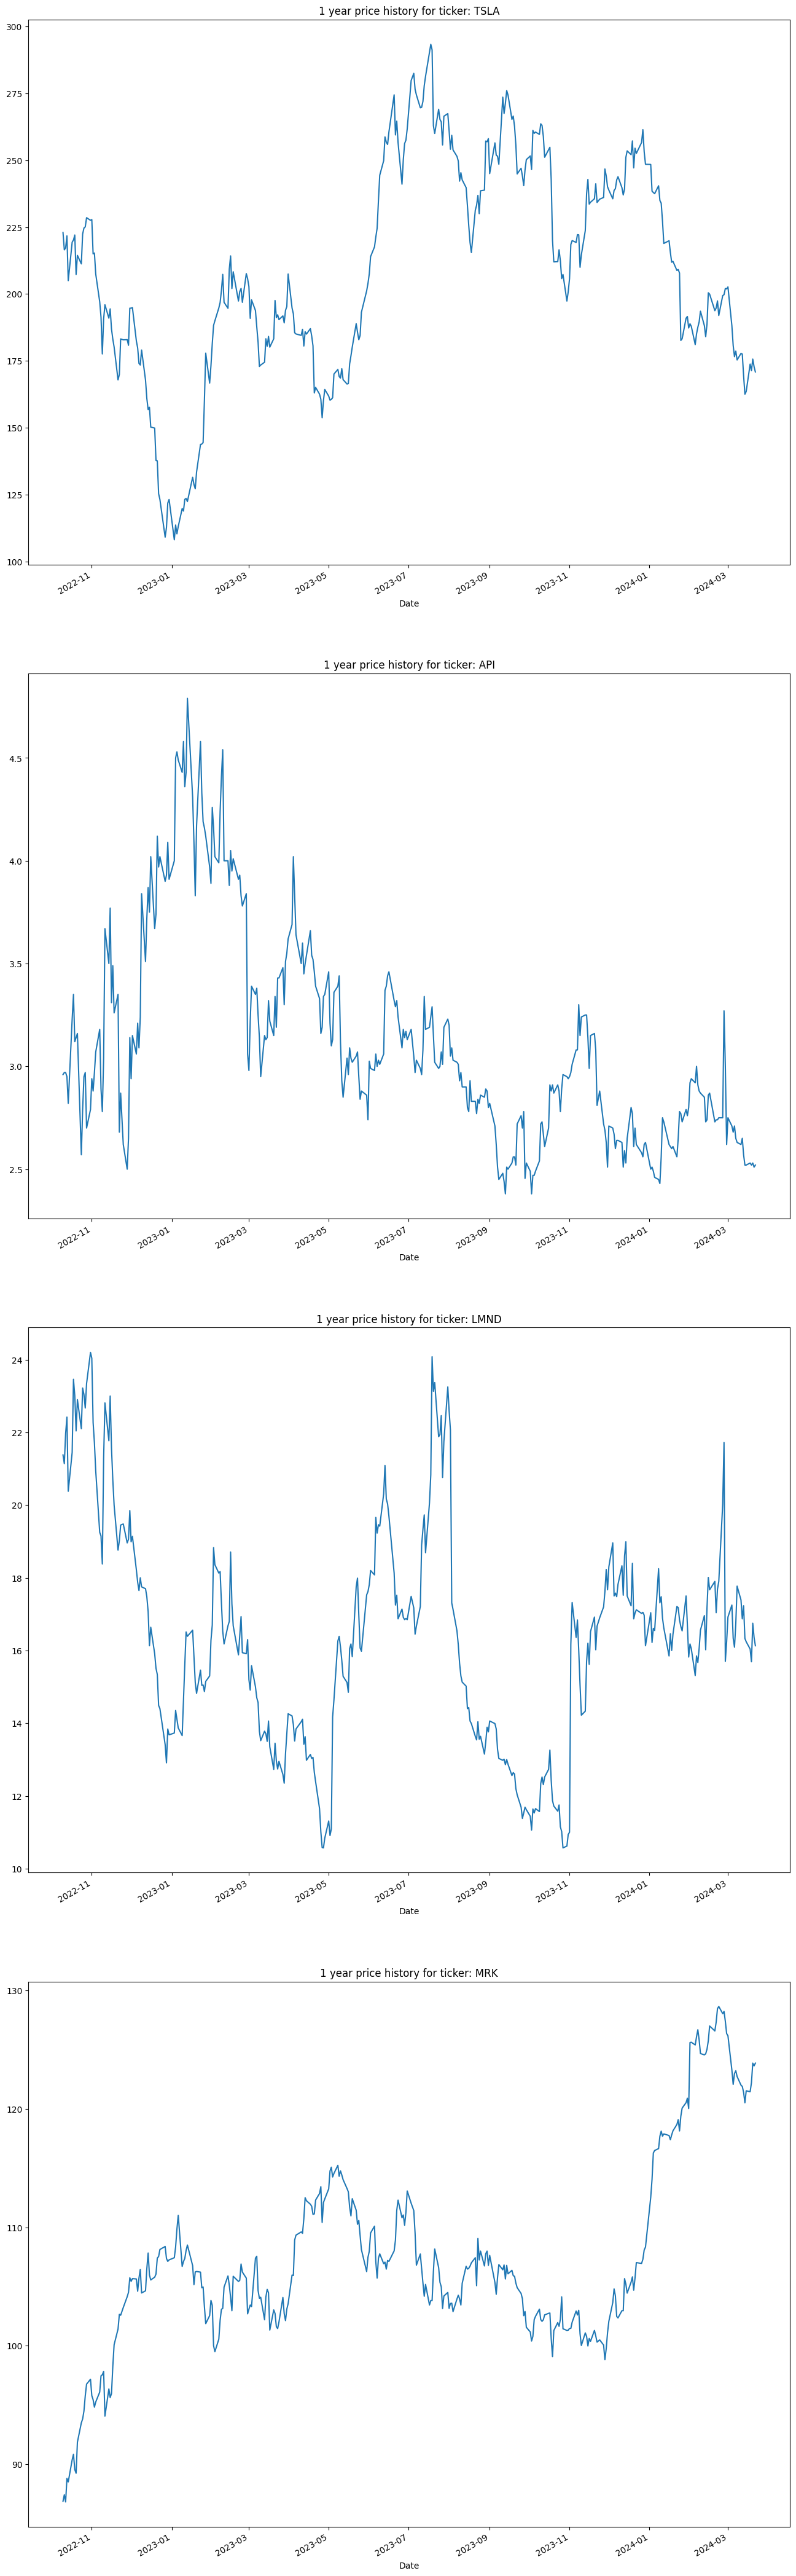

In [15]:
import matplotlib.pyplot as plt
for i,ticker in enumerate(tickers):
    current_ticker = yf.Ticker(ticker)
    plt.subplot(len(tickers),1,i+1)
    current_ticker.history(period='365d')['Close'].plot(figsize=   (16,60), title='1 year price history for ticker: '+ticker)

In [16]:
stock_52w_change = []
profitsMargins = []
tickers = ['NVS','JNJ','ABBV','AMGN']
for ticker in tickers:
    print(ticker)
    current_ticker = yf.Ticker(ticker)
    current_ticker_info = current_ticker.info
    stock_52w_change.append(current_ticker_info['52WeekChange'])
    profitsMargins.append(current_ticker_info['profitMargins'])

NVS


HTTPError: 404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v6/finance/quoteSummary/NVS?modules=financialData&modules=quoteType&modules=defaultKeyStatistics&modules=assetProfile&modules=summaryDetail&ssl=true

## DataReader

In [33]:
import pandas_datareader.data as pdr
from datetime import date
from datetime import datetime

In [32]:
date.today()

datetime.date(2024, 3, 23)

In [42]:
# set start and end date
end = date.today()
start = datetime(year=end.year-1, month=end.month, day=end.day-1)

spx_index = pdr.get_data_stooq('^SPX', start, end)


In [43]:
spx_index

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-22,5242.48,5246.09,5229.87,5234.18,2015344429
2024-03-21,5253.43,5261.10,5240.66,5241.53,2526285033
2024-03-20,5181.69,5226.19,5171.55,5224.62,2325178060
2024-03-19,5139.09,5180.31,5131.59,5178.51,2203396793
2024-03-18,5154.77,5175.60,5145.47,5149.42,2399639733
...,...,...,...,...,...
2023-03-28,3974.13,3979.20,3951.53,3971.27,1993129645
2023-03-27,3982.93,4003.83,3970.49,3977.53,2462252346
2023-03-24,3939.21,3972.74,3909.16,3970.99,2609179699


let's visualzie that

<Axes: title={'center': '1 year price history for index sp500'}, xlabel='Date'>

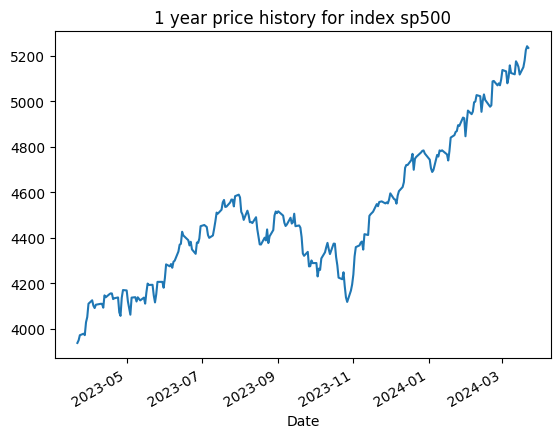

In [44]:
spx_index['Close'].plot(title='1 year price history for index sp500')

## Quandl API

In [46]:
london_fixing_gold_price = quandl.get("LBMA/GOLD",start_date=start, end_date=end, authtoken='VCzscSh8iG4khaJoeN84')


NameError: name 'quandl' is not defined

## get-all-tickers library

In [54]:
from get_all_tickers import get_tickers as gt

In [59]:
from get_all_tickers import get_tickers as gt
from get_all_tickers.get_tickers import Region
# tickers of all exchanges
tickers = gt.get_tickers()
print(tickers[:5])

# tickers from NYSE and NASDAQ only
tickers = gt.get_tickers(AMEX=False)

# default filename is tickers.csv, to specify, add argument filename='yourfilename.csv'
gt.save_tickers()

# save tickers from NYSE and AMEX only
gt.save_tickers(NASDAQ=False)

# get tickers from Asia
tickers_asia = gt.get_tickers_by_region(Region.ASIA)
print(tickers_asia[:5])

# save tickers from Europe
gt.save_tickers_by_region(Region.EUROPE, filename='EU_tickers.csv')

# get tickers filtered by market cap (in millions)
filtered_tickers = gt.get_tickers_filtered(mktcap_min=500, mktcap_max=2000)
print(filtered_tickers[:5])

# not setting max will get stocks with $2000 million market cap and up.
filtered_tickers = gt.get_tickers_filtered(mktcap_min=2000)
print(filtered_tickers[:5])

# get tickers filtered by sector
filtered_by_sector = gt.get_tickers_filtered(mktcap_min=200e3, sectors=SectorConstants.FINANCE)
print(filtered_by_sector[:5])

# get tickers of 5 largest companies by market cap (specify sectors=SECTOR)
top_5 = gt.get_biggest_n_tickers(5)
print(top_5)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 60
